In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression

path = '\\home\\student\\Documents\\bostonhouse.csv'

boston_data = pd.read_csv(path)

boston_data.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [130]:
boston_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,250.183735,3.370320,10.721386,11.291566,0.060241,0.557096,6.266328,68.188554,3.713563,9.659639,409.689759,18.440361,359.353343,12.529398,22.801506
std,147.415558,7.361111,22.701363,7.008599,0.238292,0.115125,0.704895,28.167306,1.983004,8.742461,170.935325,2.150486,86.690773,7.073848,9.167813
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,122.750000,0.081728,0.000000,5.130000,0.000000,0.453000,5.883000,45.325000,2.122350,4.000000,279.750000,17.400000,376.722500,7.165000,17.400000
50%,243.500000,0.262660,0.000000,9.795000,0.000000,0.538000,6.205000,76.700000,3.095750,5.000000,330.000000,19.000000,392.045000,11.095000,21.650000
75%,375.500000,3.681942,12.500000,18.100000,0.000000,0.631000,6.597250,93.825000,5.117025,24.000000,666.000000,20.200000,396.217500,16.425000,25.000000
max,504.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Data preprocessing

In [131]:
boston_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Exploratory analysis


some visualizations to understand the relationship of the target variable with other features

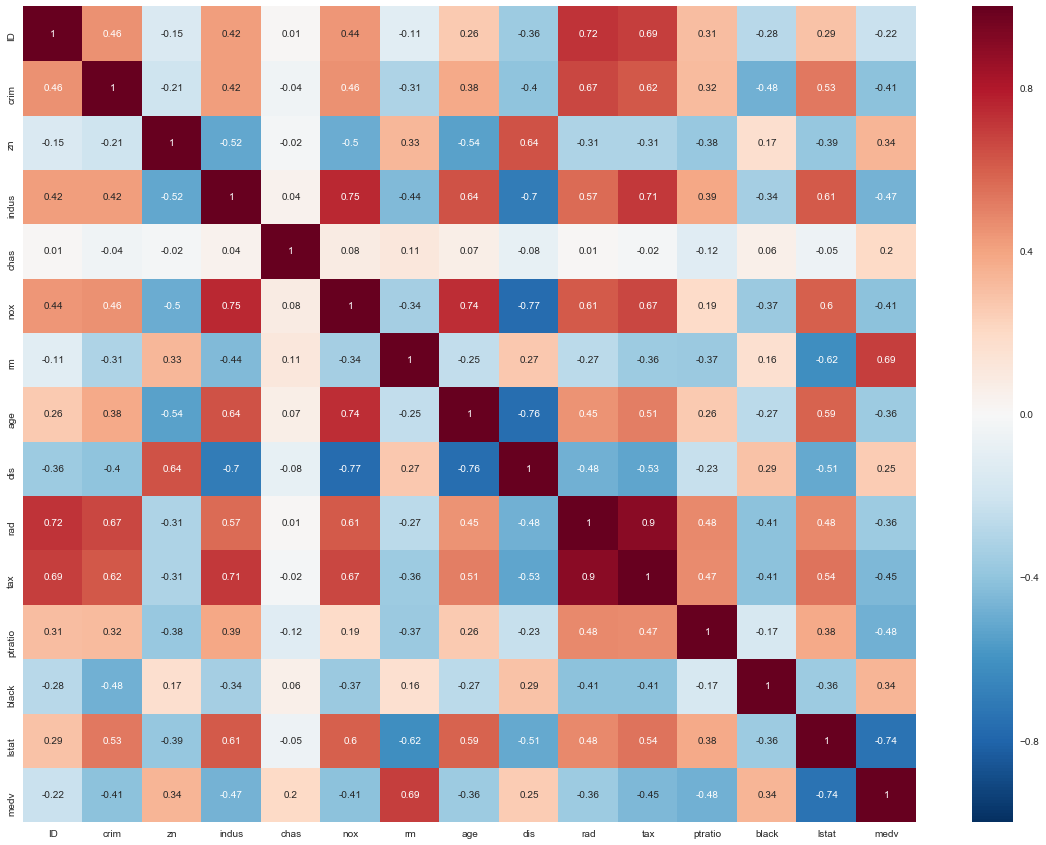

In [132]:
import seaborn as sns     # > pip install seaborn
correlation_matrix = boston_data.corr().round(2)
# annot = True to print the values inside the square
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

In [133]:
# consider only LSTAT, RM as independent variable  and MEDV as dependent variables
#X =boston_data[boston_data['lstat'],boston_data['rm']]
X=boston_data[['lstat','rm']].values


Y=boston_data['medv'].values

print(X.shape)
#print(Y.shape)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy
n=len(X)
#X=X.reshape(n,1)

m=len(Y)
Y=Y.reshape(m,1)

#creating model
reg =LinearRegression()

#fitting training data

reg = reg.fit(X,Y)

# Y prediction
y_pred = reg.predict(X)

#calculating MSE
mse = mean_squared_error(Y,y_pred)
r2_score2 = reg.score(X, Y)
r2=r2_score(Y,y_pred)

#print(np.sqrt(mse))
print(r2_score2)
print(r2)



(332, 2)
0.638660986379
0.638660986379


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
from sklearn.metrics import r2_score
import numpy

In [135]:

# model evaluation for training set
#creating model
%precision 1
reg =LinearRegression()

#fitting training data

reg = reg.fit(X_train,Y_train)

# Y prediction
y_pred = reg.predict(X_train)
print(Y_train.shape)

print(y_pred.shape)



(232, 1)
(232, 1)


In [136]:
%precision 1
n1= numpy.array(Y_train)
n2=numpy.array(y_pred)
print(n1.shape)
print(n2.shape)


(232, 1)
(232, 1)


In [137]:
# R2 score (for training set)

r2score=reg.score(X_train,Y_train)


print(r2_score(Y_train,y_pred))

print(r2score)




0.622436187181
0.622436187181


In [138]:
# model evaluation for testing set


# Y prediction
y_pred = reg.predict(X_test)

print(Y_test.shape)
print(y_pred.shape)
print(X_test.shape)
print(Y_test.shape)

(100, 1)
(100, 1)
(100, 2)
(100, 1)


In [139]:
# R2 score (for testing set)


r2=r2_score(Y_test,y_pred)
r2score1=reg.score(X_test,Y_test)


print(r2)
print(r2score1)

0.679490343562
0.679490343562
